In [2]:
from sklearn import datasets,svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [20]:
iris = datasets.load_iris()

x = iris.data
y = iris.target

In [21]:
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30,random_state = 1)

# sklearn svm implements one vs one model for multiclass 

In [22]:
clf = svm.SVC() # default kernel = "rbf" gaussian
clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
clf1 = svm.SVC(kernel = 'linear')
clf1.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
# check the scores of each classifier
print("Gaussian Model Score : ",clf.score(x_test,y_test))
print("Linear Model Score : ",clf1.score(x_test,y_test))

Gaussian Model Score :  0.977777777778
Linear Model Score :  1.0


In [25]:
# Making decision boundary for multiclass considering only two features
x = iris.data[:,0:2]

x_train , x_test, y_train, y_test = train_test_split(x,y,test_size = 0.32,random_state = 2)
clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Plotting the decision boundary for training dataset (iris)

In [30]:
#makes grid of all points contained in the window

def make_grid(f1,f2,step=0.02):
    f1_max ,f1_min = f1.max()+1,f1.min()-1
    f2_max,f2_min = f2.max()+1 , f2.min()-1
    
    a = np.arange(f1_min,f1_max,step)
    b = np.arange(f2_min,f2_max,step)
    
    ff1 , ff2 = np.meshgrid(a,b)
    
    return ff1,ff2

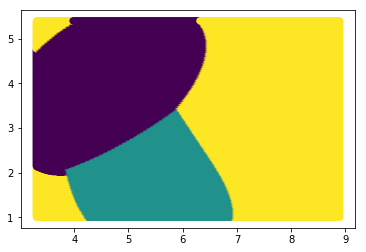

In [31]:
xx1 , xx2 = make_grid(x[:,0],x[:,1],0.015)

predictions = clf.predict(np.c_[xx1.ravel(),xx2.ravel()])

# plot feature1 pts(x-axis) vs feature2 pts(y-axis)

plt.scatter(xx1.ravel(),xx2.ravel(),c = predictions)
plt.show()